In [2]:
import geopandas as gpd
import pandas as pd
import shapely
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
import numpy as np
import fiona
import mplleaflet
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default
plt.style.use('bmh')
%pylab inline
pylab.rcParams['figure.figsize']=(20.0,20.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
villages_shp=gpd.read_file('./Village/VILLAGE_MOI_1070312.shp')
villages_shp.head()

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry
0,10013030S01,屏東縣,東港鎮,None,None,T,10013,T03,10013030,未編定村里,"POLYGON ((120.4805919500001 22.42686214900004,..."
1,64000130006,高雄市,林園區,中門里,Zhongmen Vil.,E,64000,E13,64000130,None,"POLYGON ((120.3677206890001 22.49564452100009,..."
2,10018010054,新竹市,東區,關新里,Guanxin Vil.,O,10018,O01,10018010,None,"POLYGON ((121.0216527890001 24.78572117700008,..."
3,64000130008,高雄市,林園區,港埔里,Gangpu Vil.,E,64000,E13,64000130,None,"POLYGON ((120.3732513370001 22.49123186400004,..."
4,64000100010,高雄市,旗津區,上竹里,Shangzhu Vil.,E,64000,E10,64000100,None,"POLYGON ((120.2897623490001 22.57316931000008,..."


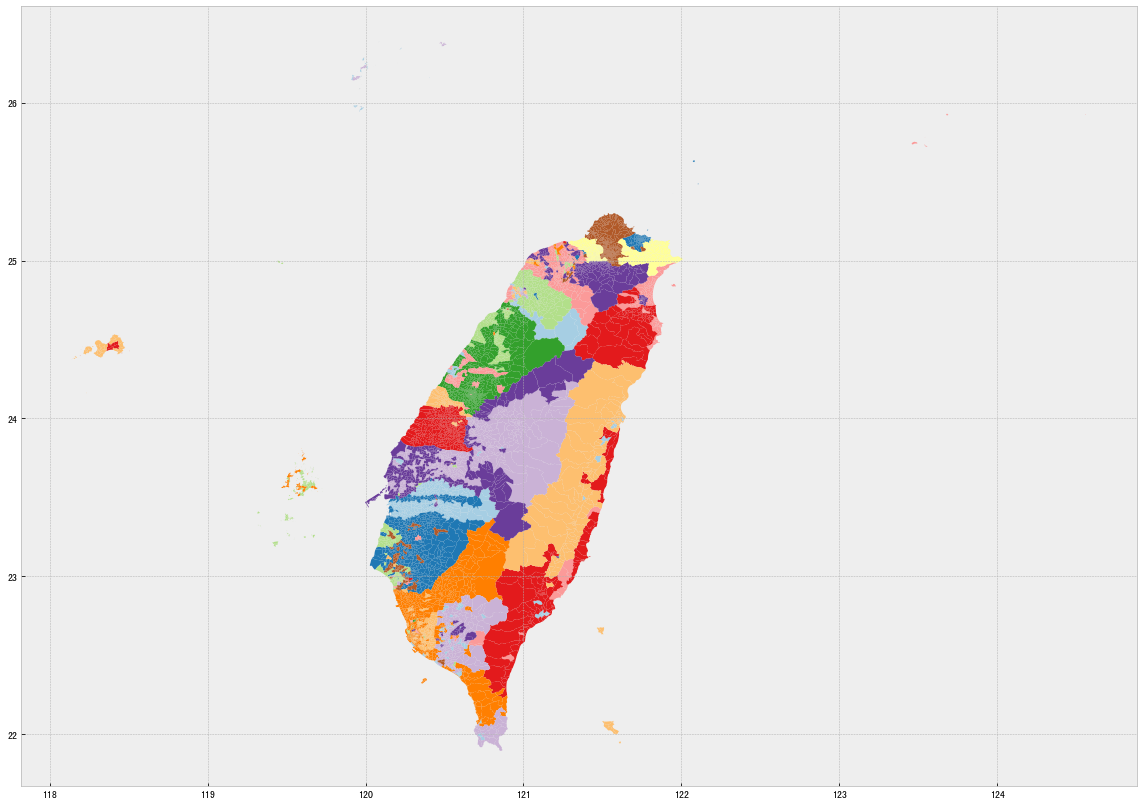

In [4]:
villages_shp.plot(cmap='Paired')

In [5]:
tainan_villages_shp=villages_shp[villages_shp['COUNTYNAME']=='臺南市'].copy(deep=True)
tainan_villages_shp=tainan_villages_shp[['COUNTYNAME','TOWNNAME','VILLNAME','geometry']]
tainan_villages_shp.head()

,COUNTYNAME,TOWNNAME,VILLNAME,geometry
780,臺南市,歸仁區,六甲里,"POLYGON ((120.2724993920001 22.95868469300007,..."
781,臺南市,歸仁區,崙頂里,"POLYGON ((120.2990937200001 22.96324021500004,..."
782,臺南市,新市區,大社里,"POLYGON ((120.3223493930001 23.09963833500007,..."
783,臺南市,安南區,青草里,"POLYGON ((120.117587175 23.08386983000008, 120..."
784,臺南市,七股區,溪南里,"POLYGON ((120.121032655 23.13549890300004, 120..."


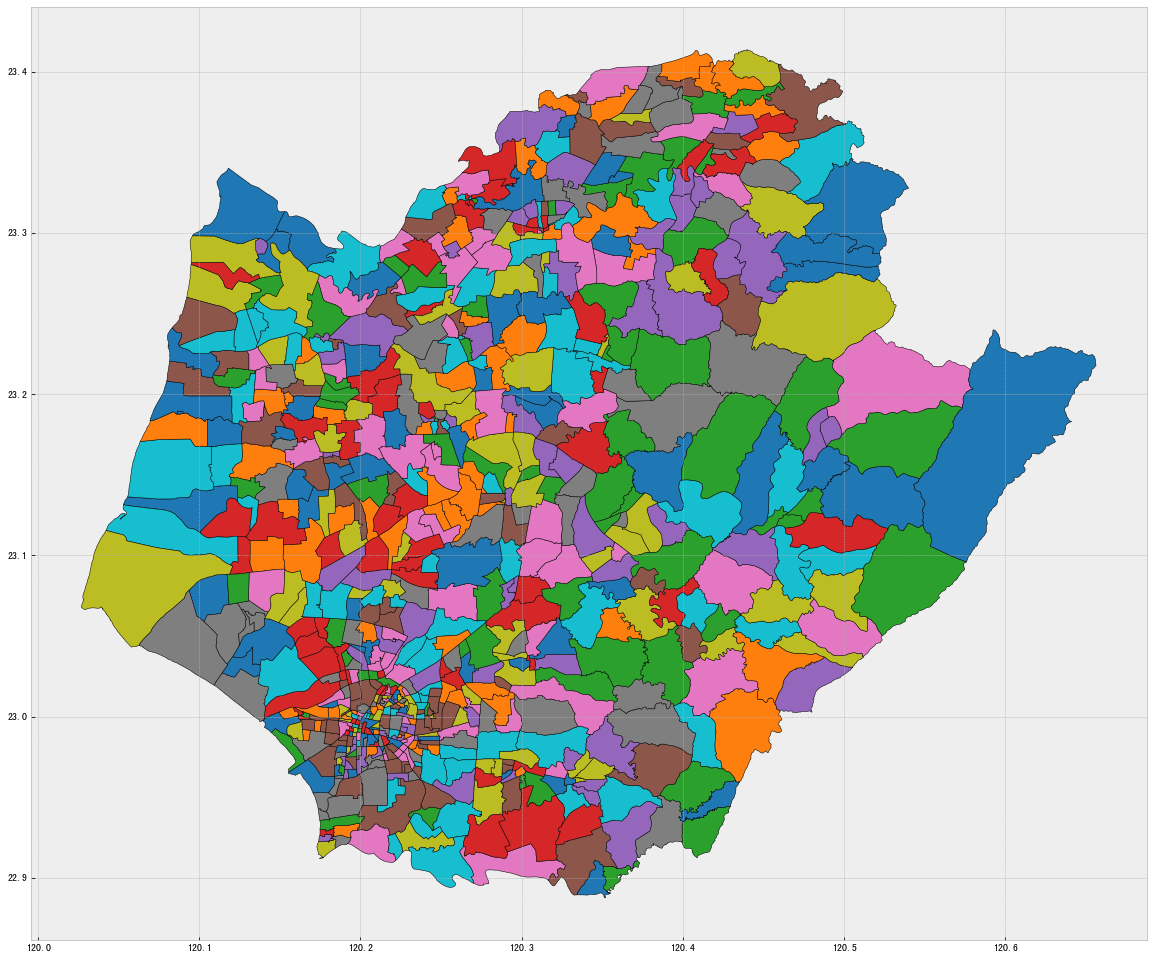

In [6]:
tainan_villages_shp.plot(column='VILLNAME', cmap='tab10_r',edgecolor='k')

In [7]:
rivers_shp=gpd.read_file("./Village/BASIN.kml")
rivers_shp=rivers_shp[['Name','geometry']]
rivers_shp.head()

,Name,geometry
0,老梅j溪,(POLYGON Z ((121.5102622960122 25.290888400759...
1,阿里磅溪,(POLYGON Z ((121.5521534083207 25.292825368854...
2,大坑溪,(POLYGON Z ((121.4842994293724 25.270784983027...
3,八連溪,(POLYGON Z ((121.4780624807429 25.262554960169...
4,北勢坑溪,(POLYGON Z ((121.4470109020607 25.239690803387...


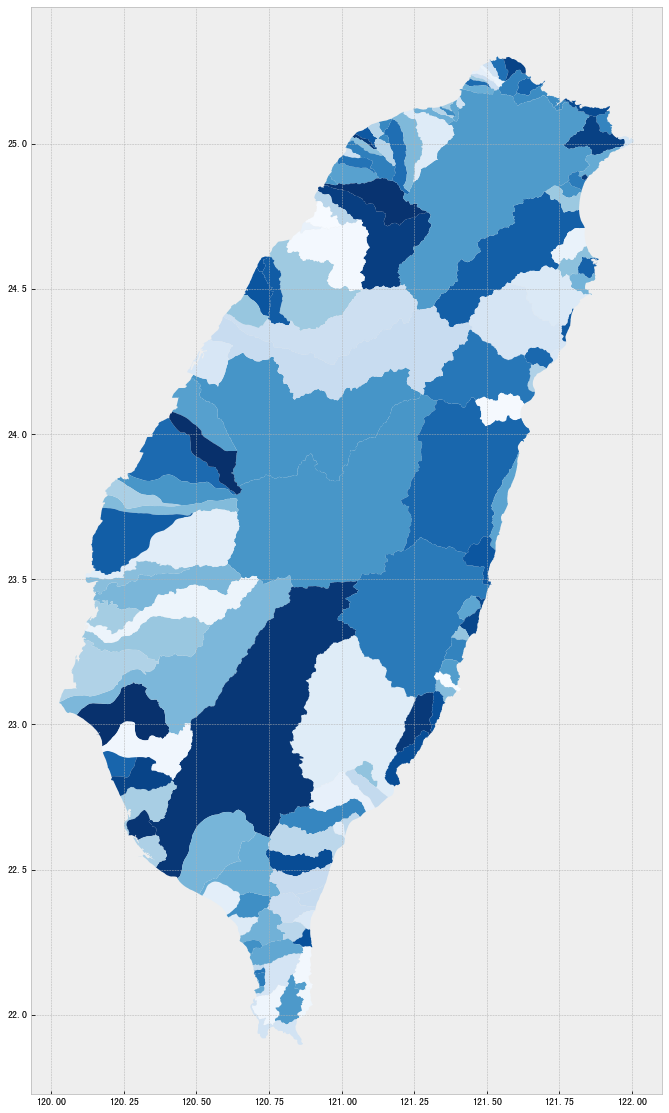

In [8]:
rivers_shp.plot(column='Name', cmap=plt.cm.Blues)

In [9]:
river1_shp=rivers_shp[rivers_shp['Name']=='二仁溪']
river2_shp=rivers_shp[rivers_shp['Name']=='鹽水溪']
river3_shp=rivers_shp[rivers_shp['Name']=='曾文溪']
river4_shp=rivers_shp[rivers_shp['Name']=='急水溪']
river5_shp=rivers_shp[rivers_shp['Name']=='八掌溪']

In [10]:
# Convert POLYGON Z to POLYGON 
# Reference:
# https://www.google.com/maps/d/u/0/viewer?mid=1-DzOSjuIOVXc9sexecwf0Q2opTXgobuL&ll=22.918950999999996%2C120.18461500000001&z=10
observ_shp=gpd.read_file("./Village/observactory.kml")
observ_shp['geometry']=observ_shp['geometry'].centroid

In [11]:
observ_shp['Description'][0:10]='二仁溪'
observ_shp['Description'][10:16]='鹽水溪'
observ_shp['Description'][16:27]='曾文溪'
observ_shp['Description'][27:34]='急水溪'
observ_shp['Description'][34:40]='八掌溪'
observ_shp.head()

,Name,Description,geometry
0,南萣橋,二仁溪,POINT (120.184615 22.918951)
1,永寧橋,二仁溪,POINT (120.19397 22.925631)
2,五空橋,二仁溪,POINT (120.221618 22.927706)
3,二層行橋,二仁溪,POINT (120.225878 22.915551)
4,石安橋,二仁溪,POINT (120.297117 22.901202)


In [12]:
river1_villages_shp = tainan_villages_shp[tainan_villages_shp.intersects(river1_shp.unary_union)==True]
river1_villages_shp_clip = river1_villages_shp.copy()
river1_villages_shp_clip['geometry'] = river1_villages_shp_clip.intersection(river1_shp.unary_union)
river1_villages_shp=river1_villages_shp[(river1_villages_shp_clip['geometry'].area /river1_villages_shp['geometry'].area) > 0.5]

river2_villages_shp = tainan_villages_shp[tainan_villages_shp.intersects(river2_shp.unary_union)==True]
river2_villages_shp_clip = river2_villages_shp.copy()
river2_villages_shp_clip['geometry'] = river2_villages_shp_clip.intersection(river2_shp.unary_union)
river2_villages_shp=river2_villages_shp[(river2_villages_shp_clip['geometry'].area /river2_villages_shp['geometry'].area) > 0.5]

river3_villages_shp = tainan_villages_shp[tainan_villages_shp.intersects(river3_shp.unary_union)==True]
river3_villages_shp_clip = river3_villages_shp.copy()
river3_villages_shp_clip['geometry'] = river3_villages_shp_clip.intersection(river3_shp.unary_union)
river3_villages_shp=river3_villages_shp[(river3_villages_shp_clip['geometry'].area /river3_villages_shp['geometry'].area) > 0.5]

river4_villages_shp = tainan_villages_shp[tainan_villages_shp.intersects(river4_shp.unary_union)==True]
river4_villages_shp_clip = river4_villages_shp.copy()
river4_villages_shp_clip['geometry'] = river4_villages_shp_clip.intersection(river4_shp.unary_union)
river4_villages_shp=river4_villages_shp[(river4_villages_shp_clip['geometry'].area /river4_villages_shp['geometry'].area) > 0.5]

river5_villages_shp = tainan_villages_shp[tainan_villages_shp.intersects(river5_shp.unary_union)==True]
river5_villages_shp_clip = river5_villages_shp.copy()
river5_villages_shp_clip['geometry'] = river5_villages_shp_clip.intersection(river5_shp.unary_union)
river5_villages_shp=river5_villages_shp[(river5_villages_shp_clip['geometry'].area /river5_villages_shp['geometry'].area) > 0.5]

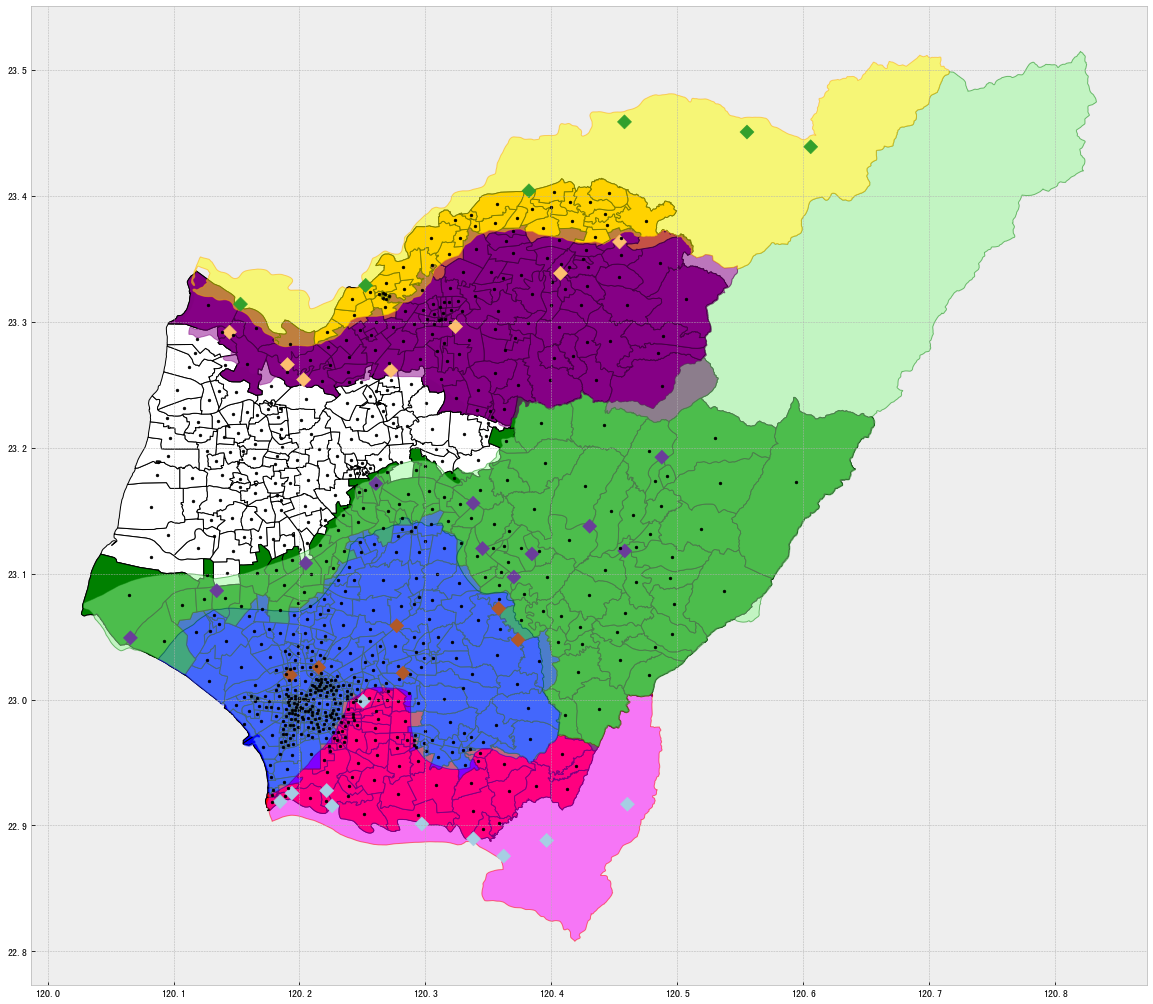

In [13]:
#ax=tainan_villages_shp.plot(column='VILLNAME', cmap='tab10_r',edgecolor='k',linewidth=1)
ax=tainan_villages_shp.plot(color='white',edgecolor='k',linewidth=1)


river1_villages_shp.plot(ax=ax, facecolor='red',edgecolor='k',linewidth=1)
river2_villages_shp.plot(ax=ax, facecolor='blue',edgecolor='k',linewidth=1)
river3_villages_shp.plot(ax=ax, facecolor='green',edgecolor='k',linewidth=1)
river4_villages_shp.plot(ax=ax, facecolor='purple',edgecolor='k',linewidth=1)
river5_villages_shp.plot(ax=ax, facecolor='orange',edgecolor='k',linewidth=1)

river1_shp.plot(ax=ax,facecolor='fuchsia',alpha=0.5,edgecolor='red',linewidth=1)
river2_shp.plot(ax=ax,facecolor='lightskyblue',alpha=0.5,edgecolor='blue',linewidth=1)
river3_shp.plot(ax=ax,facecolor='palegreen',alpha=0.5,edgecolor='green',linewidth=1)
river4_shp.plot(ax=ax,facecolor='darkmagenta',alpha=0.5,edgecolor='purple',linewidth=1)
river5_shp.plot(ax=ax,facecolor='yellow',alpha=0.5,edgecolor='orange',linewidth=1)

observ_shp.plot(ax=ax,column='Description',cmap='Paired',marker='D',markersize=100,categorical=True)
tainan_villages_shp.centroid.plot(ax=ax,color='black',markersize=8)

In [14]:
river1_villages_shp['river']='二仁溪'
river2_villages_shp['river']='鹽水溪'
river3_villages_shp['river']='曾文溪'
river4_villages_shp['river']='急水溪'
river5_villages_shp['river']='八掌溪'
river1_villages_shp.head()

,COUNTYNAME,TOWNNAME,VILLNAME,geometry,river
780,臺南市,歸仁區,六甲里,"POLYGON ((120.2724993920001 22.95868469300007,...",二仁溪
781,臺南市,歸仁區,崙頂里,"POLYGON ((120.2990937200001 22.96324021500004,...",二仁溪
811,臺南市,仁德區,保安里,"POLYGON ((120.2304346320001 22.93543616500006,...",二仁溪
812,臺南市,仁德區,三甲里,"POLYGON ((120.234425102 22.94004600600005, 120...",二仁溪
813,臺南市,仁德區,田厝里,"POLYGON ((120.2375596850001 22.94529373500006,...",二仁溪


In [15]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column='Name'):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].get_values()[0]
    return value

In [16]:
observ_river1_shp=observ_shp[observ_shp['Description']=='二仁溪']
observ_river2_shp=observ_shp[observ_shp['Description']=='鹽水溪']
observ_river3_shp=observ_shp[observ_shp['Description']=='曾文溪']
observ_river4_shp=observ_shp[observ_shp['Description']=='急水溪']
observ_river5_shp=observ_shp[observ_shp['Description']=='八掌溪']

river1_villages_shp['centroid'] = river1_villages_shp.centroid
river1_villages_shp['nearest_observ'] = river1_villages_shp.apply(nearest, geom_union=observ_river1_shp.unary_union, df1=river1_villages_shp,
                                                                     df2=observ_river1_shp, geom1_col='centroid', axis=1)
river2_villages_shp['centroid'] = river2_villages_shp.centroid
river2_villages_shp['nearest_observ'] = river2_villages_shp.apply(nearest, geom_union=observ_river2_shp.unary_union, df1=river2_villages_shp,
                                                                     df2=observ_river2_shp, geom1_col='centroid', axis=1)
river3_villages_shp['centroid'] = river3_villages_shp.centroid
river3_villages_shp['nearest_observ'] = river3_villages_shp.apply(nearest, geom_union=observ_river3_shp.unary_union, df1=river3_villages_shp,
                                                                     df2=observ_river3_shp, geom1_col='centroid', axis=1)
river4_villages_shp['centroid'] = river4_villages_shp.centroid
river4_villages_shp['nearest_observ'] = river4_villages_shp.apply(nearest, geom_union=observ_river4_shp.unary_union, df1=river4_villages_shp,
                                                                     df2=observ_river4_shp, geom1_col='centroid', axis=1)
river5_villages_shp['centroid'] = river5_villages_shp.centroid
river5_villages_shp['nearest_observ'] = river5_villages_shp.apply(nearest, geom_union=observ_river5_shp.unary_union, df1=river5_villages_shp,
                                                                     df2=observ_river5_shp, geom1_col='centroid', axis=1)

river1_villages_shp.head()

,COUNTYNAME,TOWNNAME,VILLNAME,geometry,river,centroid,nearest_observ
780,臺南市,歸仁區,六甲里,"POLYGON ((120.2724993920001 22.95868469300007,...",二仁溪,POINT (120.2791544829967 22.94752036333348),石安橋
781,臺南市,歸仁區,崙頂里,"POLYGON ((120.2990937200001 22.96324021500004,...",二仁溪,POINT (120.2940430726397 22.95119138482716),石安橋
811,臺南市,仁德區,保安里,"POLYGON ((120.2304346320001 22.93543616500006,...",二仁溪,POINT (120.238227967483 22.92335521973537),二層行橋
812,臺南市,仁德區,三甲里,"POLYGON ((120.234425102 22.94004600600005, 120...",二仁溪,POINT (120.2391489559594 22.93128623474225),五空橋
813,臺南市,仁德區,田厝里,"POLYGON ((120.2375596850001 22.94529373500006,...",二仁溪,POINT (120.2418300572598 22.93867944083052),五空橋


In [17]:
river_villages_shp=pd.concat([river1_villages_shp,river2_villages_shp,river3_villages_shp,river4_villages_shp,river5_villages_shp])
river_villages_shp.head()

,COUNTYNAME,TOWNNAME,VILLNAME,geometry,river,centroid,nearest_observ
780,臺南市,歸仁區,六甲里,"POLYGON ((120.2724993920001 22.95868469300007,...",二仁溪,POINT (120.2791544829967 22.94752036333348),石安橋
781,臺南市,歸仁區,崙頂里,"POLYGON ((120.2990937200001 22.96324021500004,...",二仁溪,POINT (120.2940430726397 22.95119138482716),石安橋
811,臺南市,仁德區,保安里,"POLYGON ((120.2304346320001 22.93543616500006,...",二仁溪,POINT (120.238227967483 22.92335521973537),二層行橋
812,臺南市,仁德區,三甲里,"POLYGON ((120.234425102 22.94004600600005, 120...",二仁溪,POINT (120.2391489559594 22.93128623474225),五空橋
813,臺南市,仁德區,田厝里,"POLYGON ((120.2375596850001 22.94529373500006,...",二仁溪,POINT (120.2418300572598 22.93867944083052),五空橋


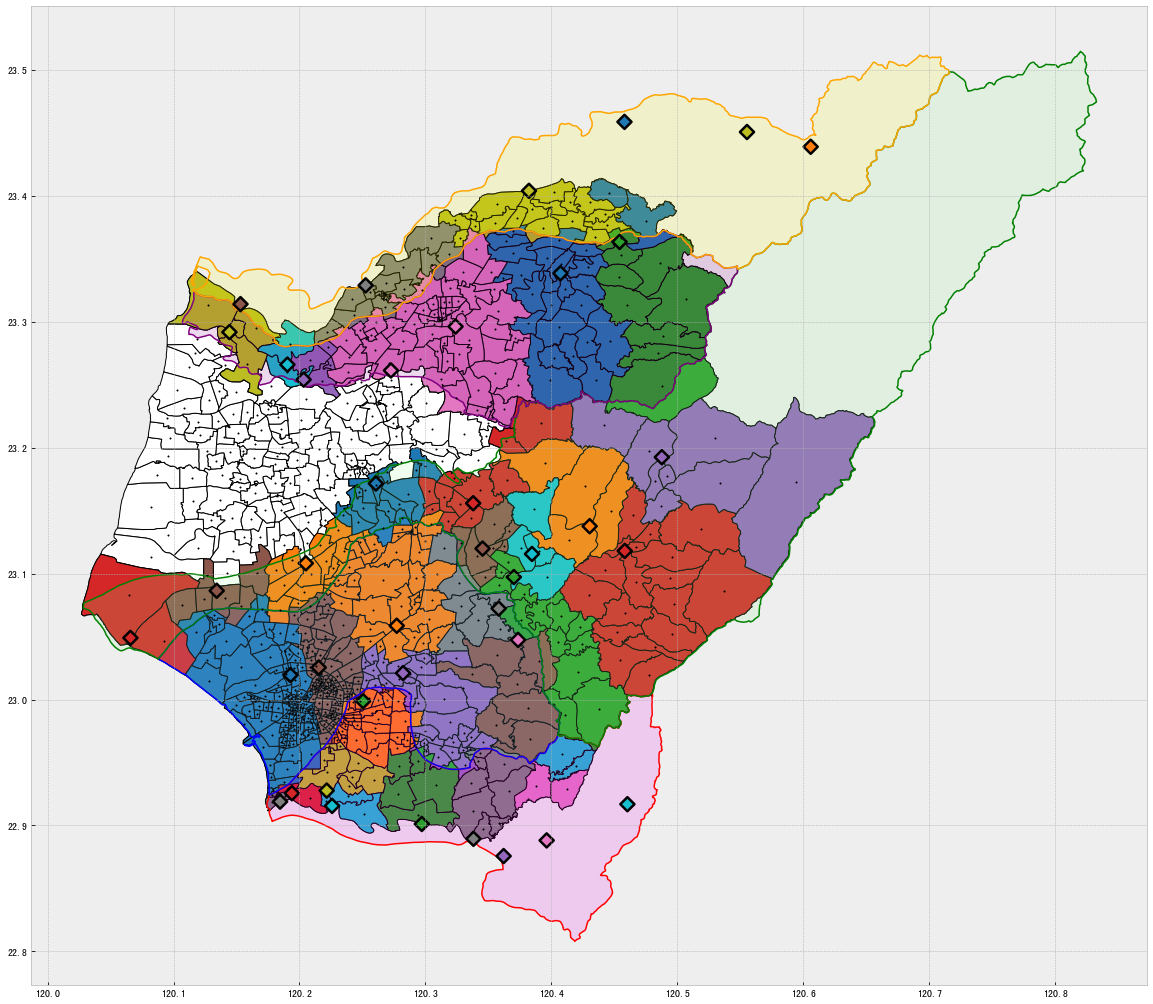

In [18]:
ax=tainan_villages_shp.plot(color='white',edgecolor='k',linewidth=1)

river_villages_shp.plot(ax=ax, column='nearest_observ', cmap='tab10_r',edgecolor='k',linewidth=1,categorical=True)

river1_shp.plot(ax=ax,facecolor=(0.9804, 0, 0.9804, 0.15),edgecolor='red',linewidth=1.5)
river2_shp.plot(ax=ax,facecolor=(0.5294, 0.8078, 0.9803, 0.15),edgecolor='blue',linewidth=1.5)
river3_shp.plot(ax=ax,facecolor=(0.5960, 0.9843, 0.5960, 0.15),edgecolor='green',linewidth=1.5)
river4_shp.plot(ax=ax,facecolor=(0.5450, 0, 0.5450, 0.15),edgecolor='purple',linewidth=1.5)
river5_shp.plot(ax=ax,facecolor=(1, 1, 0, 0.15),edgecolor='orange',linewidth=1.5)

observ_shp.plot(ax=ax, column='Name', cmap='tab10_r', edgecolor='k',linewidth=2.5, marker='D',markersize=100)

tainan_villages_shp.centroid.plot(ax=ax,color='black',markersize=2)

#tainan_villages_shp['coords'] = tainan_villages_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
#tainan_villages_shp['coords'] = [coords[0] for coords in tainan_villages_shp['coords']]
#for idx, row in tainan_villages_shp.iterrows():
#    plt.annotate(s=row['VILLNAME'], xy=row['coords'],
#                 horizontalalignment='center')

In [132]:
river_villages_shp.head()

,COUNTYNAME,TOWNNAME,VILLNAME,geometry,river,centroid,nearest_observ
780,臺南市,歸仁區,六甲里,"POLYGON ((120.2724993920001 22.95868469300007,...",二仁溪,POINT (120.2791544829967 22.94752036333348),石安橋
781,臺南市,歸仁區,崙頂里,"POLYGON ((120.2990937200001 22.96324021500004,...",二仁溪,POINT (120.2940430726397 22.95119138482716),石安橋
811,臺南市,仁德區,保安里,"POLYGON ((120.2304346320001 22.93543616500006,...",二仁溪,POINT (120.238227967483 22.92335521973537),二層行橋
812,臺南市,仁德區,三甲里,"POLYGON ((120.234425102 22.94004600600005, 120...",二仁溪,POINT (120.2391489559594 22.93128623474225),五空橋
813,臺南市,仁德區,田厝里,"POLYGON ((120.2375596850001 22.94529373500006,...",二仁溪,POINT (120.2418300572598 22.93867944083052),五空橋


In [133]:
river_villages_shp=river_villages_shp.drop(['COUNTYNAME'],axis=1)

In [134]:
river_villages_shp.columns=['town', 'village', 'geometry', 'river', 'centroid','nearest_observ']
river_villages_shp=river_villages_shp.groupby(['river','nearest_observ','town','village']).sum()

In [135]:
river_villages_shp

geometry  \
river nearest_observ town village                                                      
二仁溪   二層橋            龍崎區  石[曹]里    POLYGON ((120.40688116 22.97246177100004, 120....   
                          龍船里      POLYGON ((120.432797818 22.96004082800005, 120...   
      二層行橋           仁德區  中洲里      POLYGON ((120.2666803090001 22.92634352300007,...   
                          二行里      POLYGON ((120.221606595 22.92721279000006, 120...   
                          保安里      POLYGON ((120.2304346320001 22.93543616500006,...   
      五空橋            仁德區  三甲里      POLYGON ((120.234425102 22.94004600600005, 120...   
                          上崙里      POLYGON ((120.2700718030001 22.94836669000006,...   
                          仁和里      POLYGON ((120.2234028040001 22.96181586100005,...   
                          仁愛里      POLYGON ((120.221576883 22.96203628200004, 120...   
                          後壁里      POLYGON ((120.2383312410001 22.96024872400005,...   
                          成功里      POLYGON ((120.2250866490001 22.96158763700004,...   
                          田厝里      POLYGON ((120.2375596850001 22.94529373500006,...   
                     東區   大智里      POLYGON ((120.233204011 22.96589728700008, 120...   
                          東智里      POLYGON ((120.217005781 22.96058606200006, 120...   
      南萣橋            南區   佛壇里      POLYGON ((120.1747451690001 22.91170775300009,...   
                          同安里      POLYGON ((120.187879942 22.92640428900006, 120...   
                          松安里      POLYGON ((120.175366369 22.92612485200004, 120...   
      南雄橋            關廟區  布袋里      POLYGON ((120.349563676 22.93179368600005, 120...   
                          東勢里      POLYGON ((120.332022532 22.95800301100007, 120...   
                          松腳里      POLYGON ((120.3526931680001 22.96152399500005,...   
                          深坑里      POLYGON ((120.34870388 22.94649154800004, 120....   
                          田中里      POLYGON ((120.3717613880001 22.91075750000005,...   
                          龜洞里      POLYGON ((120.345510008 22.91072922600006, 120...   
                     龍崎區  中坑里      POLYGON ((120.3541329560001 22.96324020900005,...   
                          楠坑里      POLYGON ((120.379699648 22.94739124300008, 120...   
      古亭橋            龍崎區  大坪里      POLYGON ((120.3866781300001 22.95101579500005,...   
                          牛埔里      POLYGON ((120.429478162 22.94428151200009, 120...   
      永寧橋            仁德區  大甲里      POLYGON ((120.21018799 22.93337848900006, 120....   
                     南區   興農里      POLYGON ((120.199991877 22.93368823400004, 120...   
      石安橋            歸仁區  六甲里      POLYGON ((120.2724993920001 22.95868469300007,...   
...                                                                              ...   
鹽水溪   鹽水溪橋           安南區  海東里      POLYGON ((120.1908609660001 23.04567655500006,...   
                          海西里      POLYGON ((120.178756787 23.04317273500004, 120...   
                          淵中里      POLYGON ((120.1594793050001 23.04502295700007,...   
                          淵東里      POLYGON ((120.1741320750001 23.06142640500008,...   
                          淵西里      POLYGON ((120.171371603 23.06155712200007, 120...   
                          溪墘里      POLYGON ((120.1926303830001 23.02932030500006,...   
                          溪心里      POLYGON ((120.1834247180001 23.06086240700006,...   
                          溪東里      POLYGON ((120.1989491750001 23.02898645400006,...   
                          理想里      POLYGON ((120.191110231 23.04131829000005, 120...   
                          顯宮里      POLYGON ((120.141912756 23.06060058300005, 120...   
                          鹿耳里      POLYGON ((120.1332237300001 23.04290877500006,...   
                     安平區  億載里      POLYGON ((120.163563831 22.99735129400005, 120...   
                          國平里      POLYGON ((120.1653425110001 22.97203739100007,...   
                          平安